# HW8

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

## HW Q1)

# Repeat above for sklearn fetch_lfw_people data

a) Plot mean face and first 8 eigenfaces (principal componets).

b ) Transform one face using the mean face and eigenfaces. print the coefficients.

c ) Inverse Transform and plot the face.


In [22]:
from sklearn.datasets import fetch_lfw_people

In [51]:
digits = fetch_lfw_people(min_faces_per_person=8, resize=0.4)
X = digits.data
n_features = X.shape[1]
y = lfw_people.target
target_names = digits.target_names
n_classes = target_names.shape[0]
print(X[:,1]) 

[ 26.666666  73.       110.666664 ...  88.666664  26.666666  12.      ]


In [52]:
digits.data.shape

(4822, 1850)

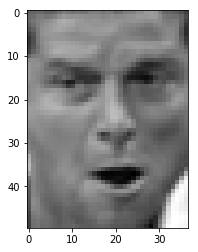

In [63]:
plt.imshow(digits.data[9,:].reshape((50,37)), cmap='gray')

In [65]:
pca = PCA(2)  # project from 64 to 2 dimensions        
projected = pca.fit_transform(digits.data)
print(digits.data.shape,projected.shape)

(4822, 1850) (4822, 2)


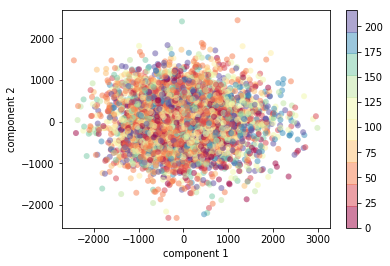

In [66]:
plt.scatter(projected[:, 0], projected[:, 1],c=digits.target, 
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

In [67]:
pca.components_

array([[-0.01070757, -0.01183349, -0.01365883, ..., -0.00793419,
        -0.00600781, -0.00428406],
       [-0.02275097, -0.02334095, -0.02509056, ...,  0.04355523,
         0.04050176,  0.03750786]], dtype=float32)

In [68]:
pca.mean_.shape

(1850,)

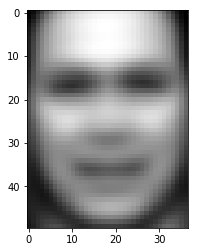

In [70]:
plt.imshow(pca.mean_.reshape((50,37)),cmap='gray')

Text(0.5, 1.0, 'Principal Components: Eigen Digits')

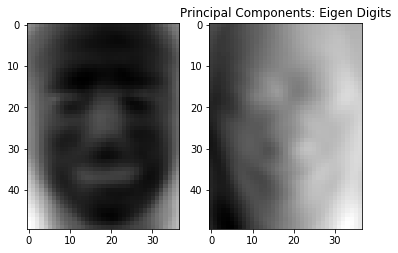

In [72]:
plt.subplot(1,2,1)
plt.imshow(pca.components_[0].reshape(50,37), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(pca.components_[1].reshape(50,37), cmap='gray')
plt.title('Principal Components: Eigen Digits')

IndexError: index 8 is out of bounds for axis 0 with size 8

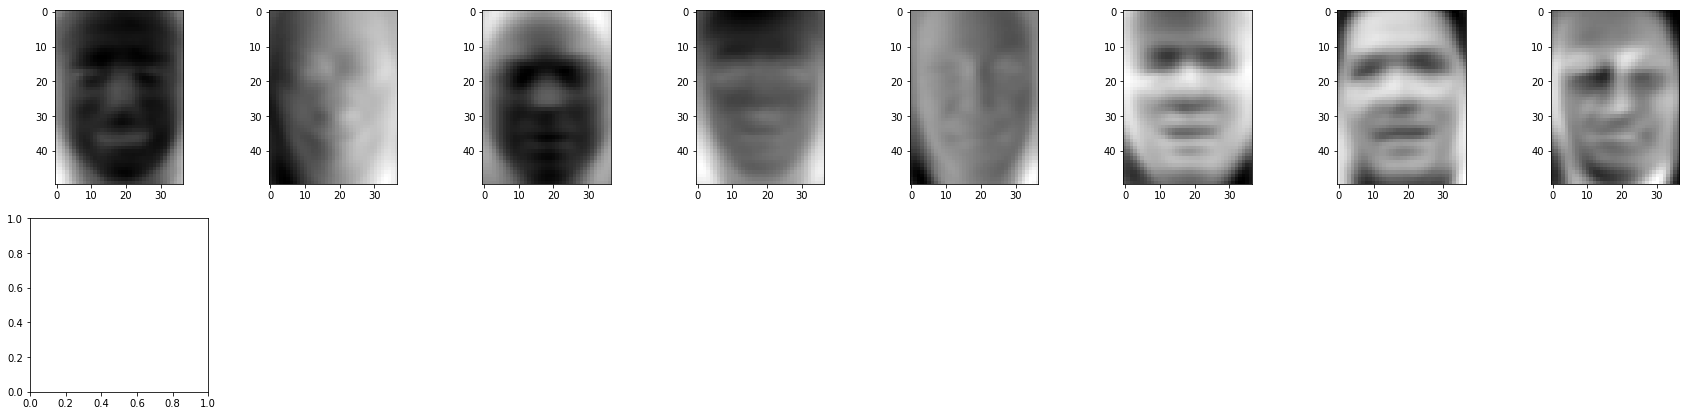

In [74]:
n_comp = 8
pca = PCA(n_comp)
projected = pca.fit_transform(digits.data)
plt.figure(figsize=(30,30))
k = 0
for i in range(8):
    for j in range(8):
        plt.subplot(8,8,k+1)
        plt.imshow(pca.components_[k].reshape(50,37), cmap='gray')
        k += 1

In [75]:
digits_0_reconstructed = pca.mean_+ projected[0].dot(pca.components_)

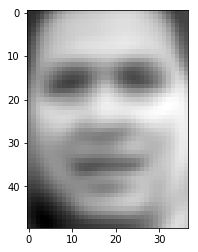

In [76]:
plt.imshow(digits_0_reconstructed.reshape(50,37), cmap='gray')

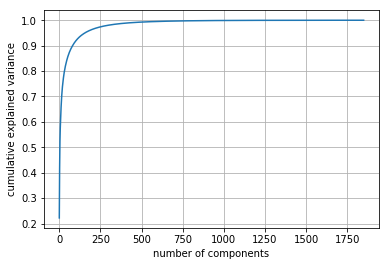

In [77]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()

## HW 8 b)



a) Write a method (kmeans) which repeats above until convergence or less than N iterations

b) Run your kmeans algorithm on digits data.

    Follow the book (Example 1: k-Means on digits).
    Plot Cluster centers learned by k-means
    Kmeans is not ideal for classification but if you treat the cluster labels as classes Plot confusion matrix



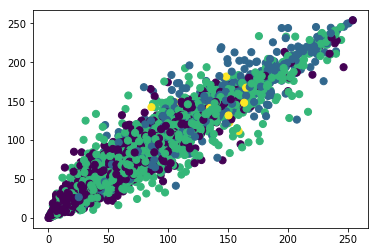

In [78]:
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clustering
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    max_ite = 10
    while True or i<max_ite:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                       for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        
        centers = new_centers

        return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis')

In [80]:
centers = np.array([X[y_labels == i].mean(0) for i in range(n_clusters)])
print(new_centers)

plt.scatter(X[:, 0], X[:, 1], c=y_labels,s=50, cmap='viridis')
plt.scatter(new_centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

NameError: name 'n_clusters' is not defined